# 1.1 Se abre el archivo de datos y se observa la informacion general

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
games = pd.read_csv("/datasets/games.csv")

In [3]:
games.info()
games.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


Comentarios: Se encontraron varios valores no nulos dentro de las columnas: "name", "year_of_release", "genre", "critic_score", "user_score" y "rating". 

In [4]:
print(games.head(15))

                           Name Platform  Year_of_Release         Genre  \
0                    Wii Sports      Wii           2006.0        Sports   
1             Super Mario Bros.      NES           1985.0      Platform   
2                Mario Kart Wii      Wii           2008.0        Racing   
3             Wii Sports Resort      Wii           2009.0        Sports   
4      Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                        Tetris       GB           1989.0        Puzzle   
6         New Super Mario Bros.       DS           2006.0      Platform   
7                      Wii Play      Wii           2006.0          Misc   
8     New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                     Duck Hunt      NES           1984.0       Shooter   
10                   Nintendogs       DS           2005.0    Simulation   
11                Mario Kart DS       DS           2005.0        Racing   
12  Pokemon Gold/Pokemon 

# 2.1 Preparación de datos

Instruccion: Renombra las columnas (ponlas en minusculas)

In [5]:
old_names = games.columns
new_columns= []
for col in old_names:
    new_columns.append(col.lower())
games.columns = new_columns

Comentarios: Se utilizo la funcion .lower() dentro de un bucle for para cambiar a minusculas los nombres de cada columna. 

# 2.2 Manejo de valores nulos

In [6]:
#Manejo de valores nulos en columna "name"
games = games.drop([14244, 659])
games.reset_index(drop=True, inplace=True)

Comentarios: En este apartado se eliminaron las filas con el indice 659 y 14244. Estos contaban con valores ausentes en la fila aportando poca a casi nada de relevancia al analisis.

In [7]:
#Manejo de valores nulos en la columna "critic_score"
games["critic_score"] = games["critic_score"].fillna(games.groupby("genre")["critic_score"].transform("mean"))

Comentarios: Los valores ausentes en la columna "critic_score" se rellenaron con la media de cada genero (respectivamente). Se realizo esta practica con el afan de tener datos mas asertados. 

In [8]:
#Manejo de valores nulos en la columna "user_score"
games['user_score'] = games['user_score'].replace('TBD', np.nan)

#Se cambia el tipo de datos de object a float
games["user_score"] = pd.to_numeric(games['user_score'], errors='coerce')

#Agrupa el dataframe games por genero y adjudica la media de cada genero a los valores nulos correspondientes
games["user_score"] = games["user_score"].fillna(games.groupby("genre")["user_score"].transform("mean"))


Comentarios: Dentro de la columna "user_score" se encontraban valores como "TBD". Estos valores que no aportan informacion se cambiaron a NaN, para que python los pudiera leer como valores ausentes. Posteriormente, estos valores se cambiaron por la media de cada genero; para hacer mejor manejo de ellos. 

In [9]:
#Manejo de valores nulos en la columna "rating"
games['rating'] = games['rating'].replace('K-A', "E")

Comentarios: Dentro de la columna "rating" habian varios valores ausentes. Los valores ausentes se dejaron como valores ausentes ya que son mas de la mitad. Por el momento, se considera que los valores ausentes en dicha columna no son impedimento para lograr un analisis efectivo y completo. Se cambio el rating de "K-A" a "E" ya que "K-A" significa kids to adults y posteriormente fue cambiado a Everyone

Comentarios generales sobre valores nulos:
Los valores ausentes se pueden deber a muchos factores: falta de data, tal como es el caso de "TBD" en donde se cree serian datos que recolectaran una vez disponibles, errores, juegos que no fueron lanzados y por ende tienen 0s en las ventas, entre otros factores. 

# 2.3 Tipos de datos

In [10]:
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y', errors='coerce')
games["critic_score"] = games["critic_score"].astype(int)

In [11]:
games.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score                int64
user_score                float64
rating                     object
dtype: object

Comentarios: Los datos de la columna "year_of_release", "user_score", y "critic_score" fueron cambiados a otro tipos de datos, datetime64, float64, y int64, respectivamente.
La columna year_of_release contiene el año de lanzamiento, es por eso que es mejor cambiarlo de float a datetime para poder agrupar, y manipular los datos de mejor manera. 

# 2.4 Numero total ventas

In [12]:
games["total_sales"]= games["na_sales"] + games["eu_sales"] + games["jp_sales"] + games["other_sales"]

In [13]:
print(games.head(10))

                        name platform year_of_release         genre  na_sales  \
0                 Wii Sports      Wii      2006-01-01        Sports     41.36   
1          Super Mario Bros.      NES      1985-01-01      Platform     29.08   
2             Mario Kart Wii      Wii      2008-01-01        Racing     15.68   
3          Wii Sports Resort      Wii      2009-01-01        Sports     15.61   
4   Pokemon Red/Pokemon Blue       GB      1996-01-01  Role-Playing     11.27   
5                     Tetris       GB      1989-01-01        Puzzle     23.20   
6      New Super Mario Bros.       DS      2006-01-01      Platform     11.28   
7                   Wii Play      Wii      2006-01-01          Misc     13.96   
8  New Super Mario Bros. Wii      Wii      2009-01-01      Platform     14.44   
9                  Duck Hunt      NES      1984-01-01       Shooter     26.93   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45   

# 3.1 Analiza los datos

Instrucciones: Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

year_of_release
1980-01-01       9
1981-01-01      46
1982-01-01      36
1983-01-01      17
1984-01-01      14
1985-01-01      14
1986-01-01      21
1987-01-01      16
1988-01-01      15
1989-01-01      17
1990-01-01      16
1991-01-01      41
1992-01-01      43
1993-01-01      60
1994-01-01     121
1995-01-01     219
1996-01-01     263
1997-01-01     289
1998-01-01     379
1999-01-01     338
2000-01-01     350
2001-01-01     482
2002-01-01     829
2003-01-01     775
2004-01-01     762
2005-01-01     939
2006-01-01    1006
2007-01-01    1197
2008-01-01    1427
2009-01-01    1426
2010-01-01    1255
2011-01-01    1136
2012-01-01     653
2013-01-01     544
2014-01-01     581
2015-01-01     606
2016-01-01     502
Name: total_sales, dtype: int64
9
1427


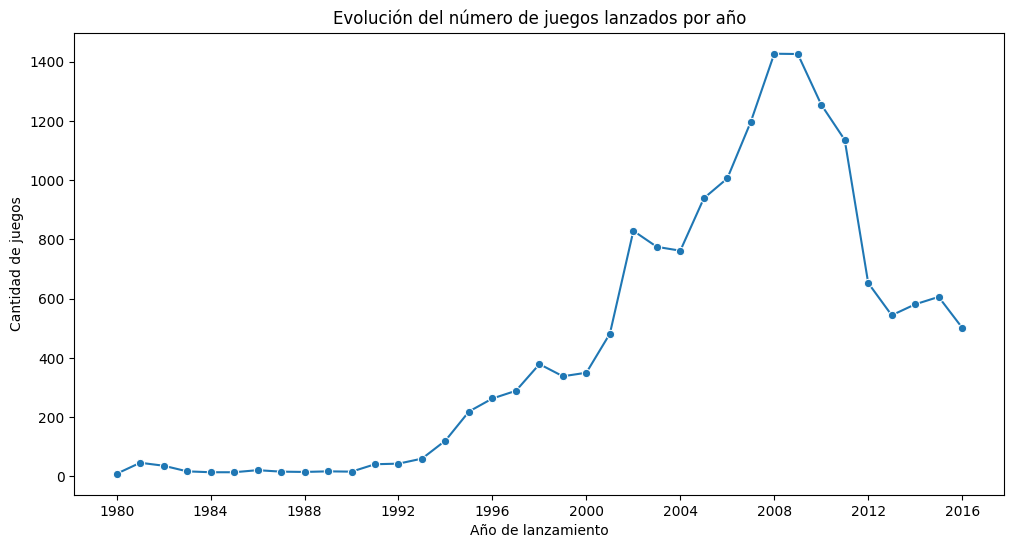

In [14]:
games_by_year = games.groupby('year_of_release')["total_sales"].count()
print(games_by_year)
print(games_by_year.min())
print(games_by_year.max())

games_by_year = games_by_year.reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_year, x="year_of_release", y="total_sales", marker="o")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de juegos")
plt.title("Evolución del número de juegos lanzados por año")
plt.show()

Comentarios: Los datos son significativos ya que se puede ver el crecimiento de la industria de manera lenta pero constante. De los años 1980 - 1995 se puede ver un crecimiento moderado debido a limitaciones tecnológicas. 
A partir de 1996 - 2011 hay un crecimiento exponencial que empieza en 263 y termina en 1136. El año 2008 siendo el "pico" con 1427 video juegos lanzados a comparación con 1980 que habia lanzado 9 video juegos. 
A partir del 2012 - 2016 se empieza a ver un declive moderado, esto se puede deber a varios factores. Muchos de los video juegos ahora son en base a suscripción, en app stores como la de google o apple. Posteriormente se añadio una gráfica para visualizar los resultados.

Instruccion: Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 

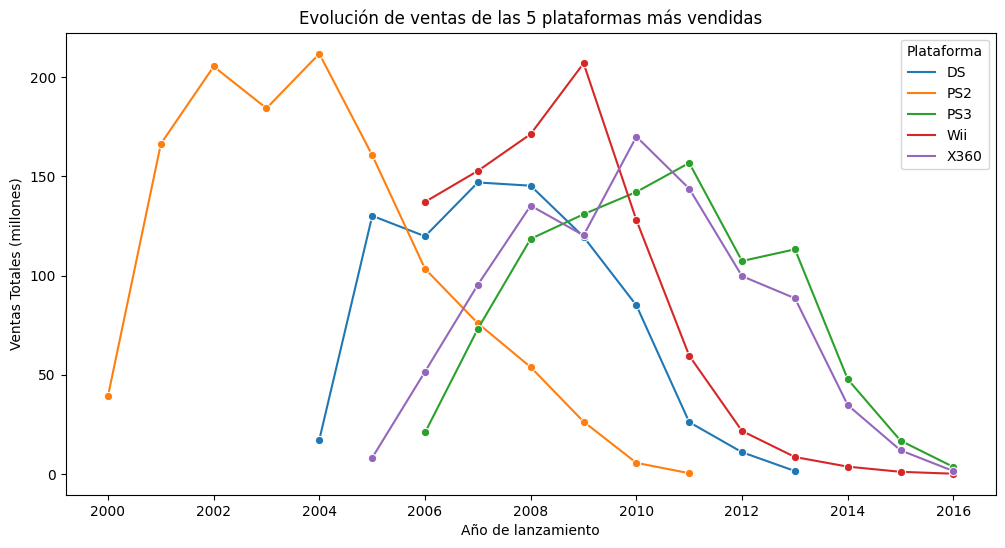

In [15]:
platform_sales = games.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5).index
sales_by_year = games[games["platform"].isin(top_platforms)]
sales_by_year = sales_by_year.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index()
sales_by_year.drop(0, inplace=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=sales_by_year, x="year_of_release", y="total_sales", hue="platform", marker="o")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas Totales (millones)")
plt.title("Evolución de ventas de las 5 plataformas más vendidas")
plt.legend(title="Plataforma")
plt.show()

Comentarios: Se agruparon los juegos por plataforma y total de ventas y se uso el parametro ascending=False para que este imprimiera las plataformas con mas ventas. 

Despues de identificar las top 5 plataformas en ventas totales se filtro el dataframes games utilizando la funcion isin() para buscar los nombres de la plataforma que estuvieran en el dataframe y en la variable top_platforms. Ese dataframe filtrado se agrupo por plataforma y año y se graficaron sus ventas. 

En la grafica anterior podemos observar como la PS2 alcanzó su punto máximo alrededor de 2002-2004 con más de 200 millones en ventas antes de descender gradualmente.
La DS tuvo un pico alto cerca de 2008, aunque no tan alto como la PS2.
La Wii tuvo un pico en 2009-2010, con un declive posterior bastante rápido, mucho mas agresivo que el de la DS. 
La X360 y la PS3 también tuvieron su auge entre 2008 y 2012.
Todas las plataformas siguen un patrón de crecimiento, pico y declive, reflejando el ciclo de vida típico de una consola de videojuegos.

Instruccion: Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [16]:
# Encontrar el último año en el que cada plataforma tuvo ventas
last_year_sales = games.groupby("platform")["year_of_release"].max()

# Encontrar el año más reciente en el dataset
max_year = games["year_of_release"].max()

# Identificar plataformas que ya no tienen ventas recientes
old_platforms = last_year_sales[last_year_sales < max_year]
print("El ultimo año que esta plataforma tuvo ventas:\n", old_platforms.sort_values())

first_year_sales = games.groupby("platform")["year_of_release"].min()
last_year_sales = games.groupby("platform")["year_of_release"].max()

# Calcular la duración de vida de cada plataforma en el mercado
platform_lifetime = last_year_sales - first_year_sales
platform_lifetime_years = platform_lifetime.dt.days / 365
filtered_lifetime = platform_lifetime_years.loc[old_platforms.index]

print("Años que duró en el mercado:\n", filtered_lifetime.sort_values(ascending=False))


El ultimo año que esta plataforma tuvo ventas:
 platform
2600   1989-01-01
GG     1992-01-01
SCD    1994-01-01
GEN    1994-01-01
NES    1994-01-01
TG16   1995-01-01
3DO    1995-01-01
NG     1996-01-01
PCFX   1996-01-01
SNES   1999-01-01
SAT    1999-01-01
WS     2001-01-01
GB     2001-01-01
N64    2002-01-01
PS     2003-01-01
GBA    2007-01-01
GC     2007-01-01
DC     2008-01-01
XB     2008-01-01
PS2    2011-01-01
DS     2013-01-01
PSP    2015-01-01
Name: year_of_release, dtype: datetime64[ns]
Años que duró en el mercado:
 platform
DS      28.019178
GB      13.010959
NES     11.008219
PSP     11.008219
PS2     11.008219
DC      10.005479
2600     9.008219
SNES     9.005479
PS       9.005479
XB       8.005479
GBA      7.005479
N64      6.005479
GC       6.002740
SAT      5.002740
GEN      4.002740
NG       3.000000
WS       2.002740
3DO      1.000000
SCD      1.000000
PCFX     0.000000
GG       0.000000
TG16     0.000000
Name: year_of_release, dtype: float64


Comentarios: Las top 5 plataformas que solian ser populares y ahora no tienen ventas son DS, GB, NES, PSP, PS2, CS. Estas duraron mas de 10 años en el mercado 

Instruccion: Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

In [17]:
recent_years = games[games["year_of_release"] > pd.Timestamp("2007-01-01")].reset_index(drop=True)
print(recent_years)

                                                  name platform  \
0                                       Mario Kart Wii      Wii   
1                                    Wii Sports Resort      Wii   
2                            New Super Mario Bros. Wii      Wii   
3                                   Kinect Adventures!     X360   
4                                         Wii Fit Plus      Wii   
...                                                ...      ...   
8125                                  Aiyoku no Eustia      PSV   
8126  SCORE International Baja 1000: The Official Game      PS2   
8127                     Samurai Warriors: Sanada Maru      PS3   
8128                           Haitaka no Psychedelica      PSV   
8129                               Winning Post 8 2016      PSV   

     year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  \
0         2008-01-01      Racing     15.68     12.76      3.79         3.29   
1         2009-01-01      Sports     

Comentarios: Cree otro dataframe llamado recent_years en donde se muestran solamente los datos con 10 años de anterioridad (2007 a la actualidad). Estos datos son los que son considerados los mas relevantes para el analisis y prediccion para el 2017. 

Instrucciones: ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Ventas totales por plataforma apartir del 2007:
 platform
PS3     837.19
X360    805.96
Wii     601.26
DS      388.60
PS4     314.14
3DS     257.81
XOne    159.32
PC      151.29
PSP     136.38
PS2      86.39
WiiU     82.19
PSV      53.81
XB        0.18
DC        0.04
Name: total_sales, dtype: float64


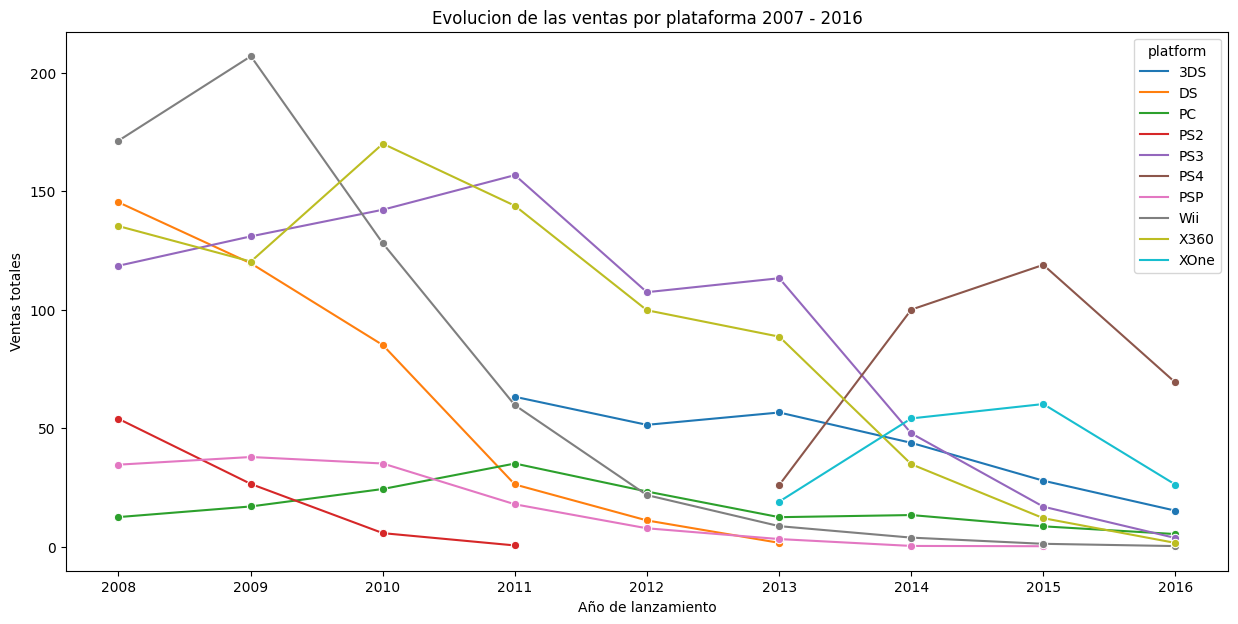

In [18]:
top_10_platforms = recent_years.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print("Ventas totales por plataforma apartir del 2007:\n", top_10_platforms)

top_10_platforms_index = top_10_platforms.head(10).index
top_10_platforms = recent_years[recent_years["platform"].isin(top_10_platforms_index)]
sales_by_year_platforms = top_10_platforms.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index()

plt.figure(figsize=(15,7))
sns.lineplot(data=sales_by_year_platforms, x="year_of_release", y="total_sales", hue="platform", marker="o")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales")
plt.title("Evolucion de las ventas por plataforma 2007 - 2016")
plt.show()

Comentarios: La gráfica muestra la evolución de las plataformas a lo largo del tiempo, destacando la desaparición de algunas, como PS2 y DS, y la aparición de nuevas, como PS4, XOne y 3DS. Algunas plataformas, como PC, PS3, PSP (hasta 2015), Wii y X360, han mantenido una presencia estable durante nueve años. Este comportamiento puede atribuirse a la sucesión de modelos, donde el declive de una plataforma, como PS2, coincide con la llegada de su sucesora, PS3, y posteriormente PS4 en 2013, con expectativas de mayores ventas.

Las cinco plataformas líderes en ventas entre 2007 y 2016 son PS3, X360, Wii, DS y PS4. Sin embargo, algunas han comenzado a declinar debido al lanzamiento de modelos más recientes. En contraste, PS4 y XOne muestran un crecimiento constante. Las plataformas más rentables son PS4, XOne, PS3 y PC. Aunque PS3 y X360 están en declive, su alto volumen de ventas sugiere que seguirán teniendo demanda, especialmente por su ventaja económica frente a las nuevas generaciones. Por otro lado, la PC, aunque no ha registrado picos de ventas, se ha mantenido estable a lo largo del periodo analizado y se espera que continúe con esta tendencia.

Instrucciones: Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

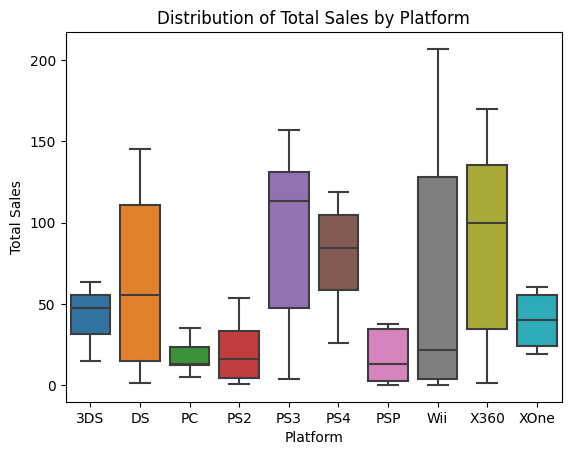

In [19]:
sns.boxplot(x="platform", y="total_sales", data=sales_by_year_platforms)

plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.title("Distribution of Total Sales by Platform")

plt.show()

Comentario: Aunque las plataformas tienen diferentes promedios de ventas, la mayoría de ellas (3DS, DS, PS3, PS4, Wii, X360 y XOne) tienen un rango de ventas que se solapa en su 50% central. Esto significa que, aunque sus valores promedio varíen, los datos de ventas más comunes (los que están dentro de la caja del boxplot, entre el 25% y el 75% de las ventas) están en rangos similares. Las ventas de estas plataformas no son exactamente iguales, pero los valores más frecuentes de ventas son parecidos.

Instrucciones: Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

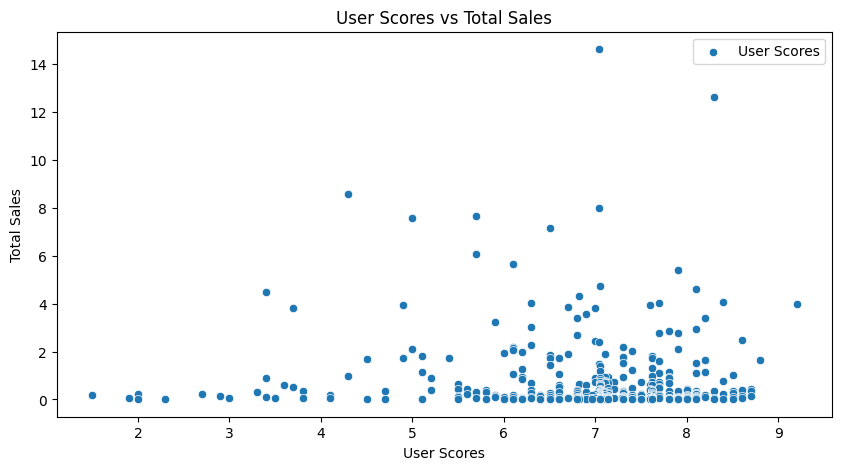

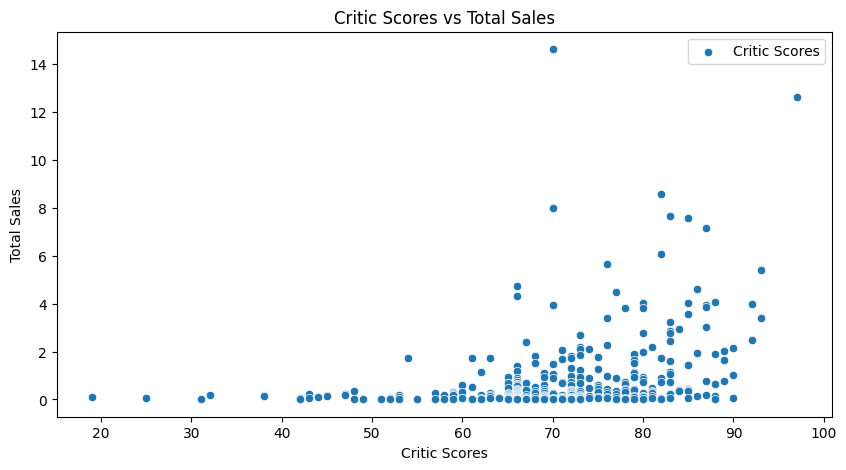

Correlación User Scores y Ventas: -0.05087603661306389
Correlación Critic Scores y Ventas 0.3578116726089931


In [20]:
data_ps4 = recent_years[recent_years["platform"] == "PS4"]

#User score y total sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_ps4, x="user_score", y="total_sales", label="User Scores")
plt.title("User Scores vs Total Sales")
plt.xlabel("User Scores")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

#Crtitic score y total sales
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data_ps4, x="critic_score", y="total_sales", label="Critic Scores")
plt.title("Critic Scores vs Total Sales")
plt.xlabel("Critic Scores")
plt.ylabel("Total Sales")
plt.legend()
plt.show()

# Correlación de critic_score/ user_score y total_sales
user_correlation = data_ps4["user_score"].corr(data_ps4["total_sales"])
critic_correlation = data_ps4["critic_score"].corr(data_ps4["total_sales"])

print("Correlación User Scores y Ventas:", user_correlation)
print("Correlación Critic Scores y Ventas", critic_correlation)

Comentarios: El análisis de correlación revela que no existe una relación positiva significativa entre critic_score y user_score. La correlación entre user_score y total_sales es de -0.05, lo que indica que las puntuaciones de los usuarios no tienen un impacto relevante en las ventas. Por otro lado, la correlación entre critic_score y total_sales es de 0.36, lo que sugiere una relación positiva moderada. Si bien las calificaciones de los críticos parecen influir en las ventas, este efecto no es lo suficientemente fuerte como para considerarse el único factor determinante.


Instrucciones: Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Total de juegos por genero:
 Action          1775
Misc             948
Sports           926
Adventure        772
Role-Playing     691
Shooter          568
Simulation       454
Racing           389
Fighting         287
Strategy         274
Puzzle           250
Platform         218
Name: genre, dtype: int64


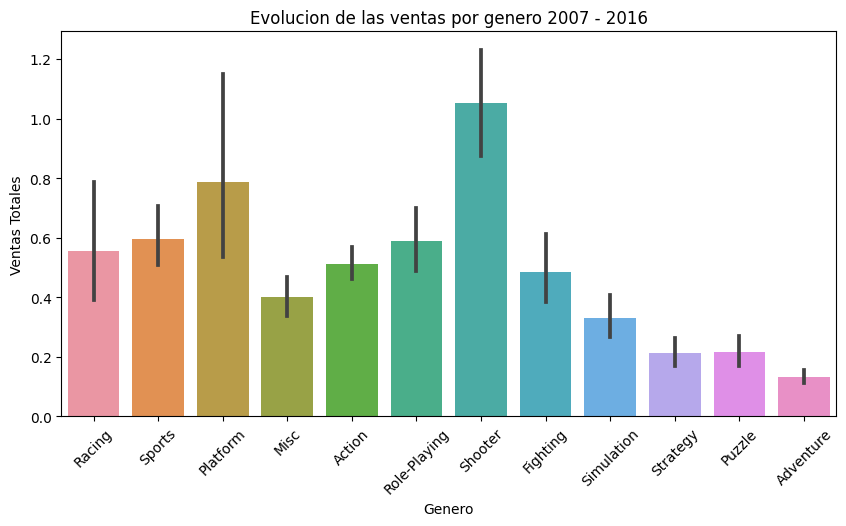

In [21]:
genre_counts = top_10_platforms["genre"].value_counts()
print("Total de juegos por genero:\n",genre_counts)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_10_platforms, x="genre", y="total_sales")
plt.xlabel("Genero")
plt.ylabel("Ventas Totales")
plt.title("Evolucion de las ventas por genero 2007 - 2016")
plt.xticks(rotation=45)
plt.show()

Comentarios: Se realizó un análisis de la cantidad de juegos por género y las ventas totales para identificar cuáles son los géneros más rentables. Sin embargo, quedó evidente que la cantidad de juegos no está directamente relacionada con la rentabilidad. Un género puede tener una alta cantidad de juegos, pero generar ventas bajas, mientras que otro con menos juegos puede destacar por sus ingresos elevados.

De acuerdo con los resultados:

Géneros con más juegos: Acción, Misc, y Sports.
Géneros con mayores ventas totales: Shooter, Platform, y Sports.

El único género que combina una alta cantidad de juegos y ventas significativas es Sports, lo que sugiere que logra atraer tanto a desarrolladores como a consumidores. Por otro lado, géneros como Shooter, aunque cuentan con menos juegos, generan mayores ingresos, posiblemente debido al éxito de franquicias de alto presupuesto.

La comparación entre la cantidad de juegos y las ventas sugiere que la rentabilidad depende más de la calidad y el impacto del producto que de la cantidad de lanzamientos en un género determinado.

# 4.1 Crea un perfil de usuario para cada región

Instrucciones: 

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales.


In [22]:
na_top_5_platforms = recent_years.groupby("platform")["na_sales"].sum().nlargest(5)
eu_top_5_platforms = recent_years.groupby("platform")["eu_sales"].sum().nlargest(5)
jp_top_5_platforms = recent_years.groupby("platform")["jp_sales"].sum().nlargest(5)

print("Top 5 plataformas de NA:\n",na_top_5_platforms)
print()
print("Top 5 plataformas de EU:\n",eu_top_5_platforms)
print()
print("Top 5 plataformas de JP:\n",jp_top_5_platforms)

Top 5 plataformas de NA:
 platform
X360    490.69
PS3     349.13
Wii     332.87
DS      198.73
PS4     108.74
Name: na_sales, dtype: float64

Top 5 plataformas de EU:
 platform
PS3     293.73
X360    234.88
Wii     170.74
PS4     141.09
PC       92.17
Name: eu_sales, dtype: float64

Top 5 plataformas de JP:
 platform
3DS    100.62
DS      76.12
PS3     74.11
PSP     60.46
Wii     47.01
Name: jp_sales, dtype: float64


Describe las variaciones de sus cuotas en las 3 regiones:

No todas las plataformas mantienen una popularidad uniforme en las tres regiones analizadas (América del Norte, Europa y Japón). Sin embargo, PlayStation 3 (PS3) y Wii son las únicas plataformas que aparecen en el top 5 de ventas en todas las regiones, lo que indica su impacto global en la industria de los videojuegos.

Otras plataformas, como PC y Nintendo 3DS (3DS), presentan un éxito localizado en una sola región, mientras que algunas, como Xbox 360 y Nintendo DS (DS), logran una fuerte presencia en dos de las tres regiones.

A continuación, se analiza el desempeño de PS3 y Wii, destacando sus variaciones en ventas por región:

PS3:
NA: 349.13
EU: 293.73
JP: 74.11

Wii: 
NA: 332.87
EU: 170.74
JP: 47.01 

Aunque PS3 y Wii lograron posicionarse en las tres regiones, sus ventas en Japón son significativamente menores en comparación con NA y EU. El mercado de NA muestra el mayor volumen de ventas en general, lo que resalta su papel como la región más lucrativa para la industria de los videojuegos.


Los cinco géneros principales. Explica la diferencia.

Top 5 genre in NA:
 genre
Action          420.32
Shooter         307.44
Sports          273.49
Misc            205.43
Role-Playing    152.62
Name: na_sales, dtype: float64

Top 5 genre in EU:
 genre
Action          299.49
Shooter         205.11
Sports          182.80
Misc            102.34
Role-Playing     92.41
Name: eu_sales, dtype: float64

Top 5 genre in JP:
 genre
Role-Playing    129.45
Action           82.23
Misc             32.57
Sports           29.12
Fighting         21.37
Name: jp_sales, dtype: float64


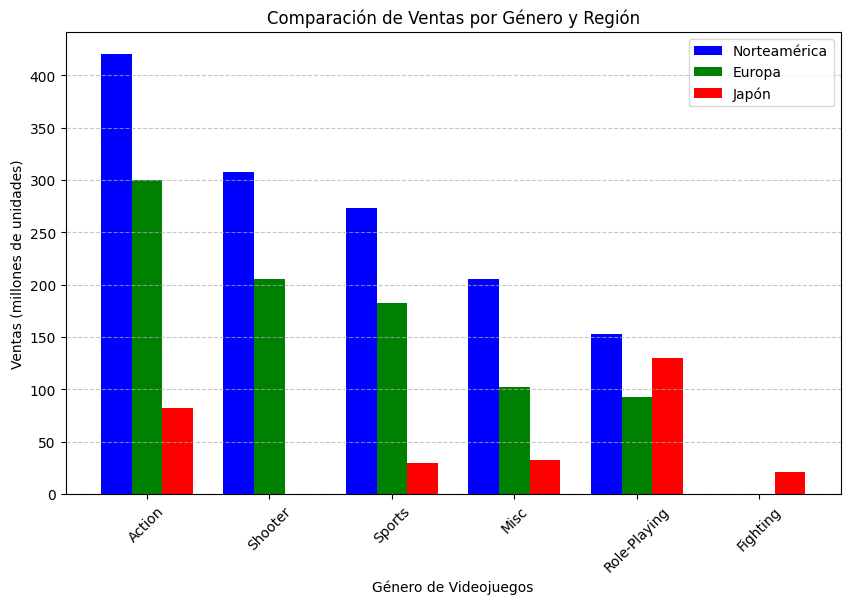

In [23]:
top_na_genre = top_10_platforms.groupby("genre")["na_sales"].sum().nlargest(5)
top_eu_genre = top_10_platforms.groupby("genre")["eu_sales"].sum().nlargest(5)
top_jp_genre = top_10_platforms.groupby("genre")["jp_sales"].sum().nlargest(5)
print("Top 5 genre in NA:\n",top_na_genre)
print()
print("Top 5 genre in EU:\n",top_eu_genre)
print()
print("Top 5 genre in JP:\n",top_jp_genre)

genres = ["Action", "Shooter", "Sports", "Misc", "Role-Playing", "Fighting"]
na_sales = [420.32, 307.44, 273.49, 205.43, 152.62, 0]
eu_sales = [299.49, 205.11, 182.80, 102.34, 92.41, 0]
jp_sales = [82.23, 0, 29.12, 32.57, 129.45, 21.37]

x = np.arange(len(genres))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Crear las barras para cada región
ax.bar(x - width, na_sales, width, label="Norteamérica", color="blue")
ax.bar(x, eu_sales, width, label="Europa", color="green")
ax.bar(x + width, jp_sales, width, label="Japón", color="red")

# Etiquetas y título
ax.set_xlabel("Género de Videojuegos")
ax.set_ylabel("Ventas (millones de unidades)")
ax.set_title("Comparación de Ventas por Género y Región")
ax.set_xticks(x)
ax.set_xticklabels(genres)
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visibilidad
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Agregar líneas de referencia en Y
plt.show()

Comentarios:
En contraste con el análisis de plataformas, varios géneros son populares en las tres regiones: Action, Sports, Role-Playing y Misc. Norteamérica y Europa presentan patrones de consumo similares, ya que su clasificación de géneros más vendidos es idéntica, aunque con diferencias en volumen de ventas. En cambio, Japón muestra una tendencia distinta, con Role-Playing como el género más vendido, mientras que en NA y EU ocupa la quinta posición. Además, Fighting es el quinto género más popular en Japón, a diferencia de NA y EU, donde Shooter ocupa ese lugar. Esto sugiere diferencias culturales y de preferencia en el consumo de videojuegos entre regiones.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

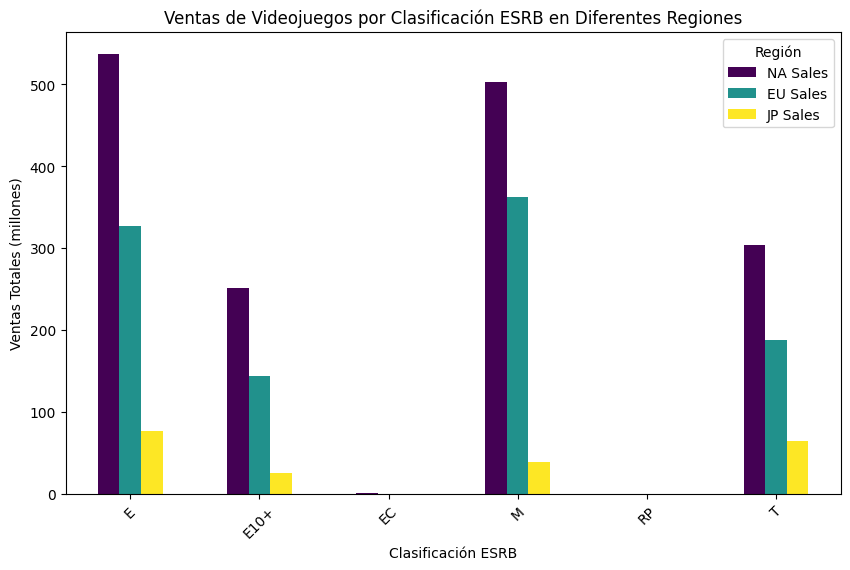

In [24]:
na_sales_by_rating = recent_years.groupby("rating")["na_sales"].sum()
eu_sales_by_rating = recent_years.groupby("rating")["eu_sales"].sum()
jp_sales_by_rating = recent_years.groupby("rating")["jp_sales"].sum()

# Crear un DataFrame combinando los datos
esrb_sales_df = pd.DataFrame({
    "NA Sales": na_sales_by_rating,
    "EU Sales": eu_sales_by_rating,
    "JP Sales": jp_sales_by_rating
})

# Crear gráfico de barras para comparar ventas por clasificación ESRB
esrb_sales_df.plot(kind="bar", figsize=(10,6), colormap="viridis")

# Configurar etiquetas y título
plt.title("Ventas de Videojuegos por Clasificación ESRB en Diferentes Regiones")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.xticks(rotation=45)
plt.legend(title="Región")

# Mostrar gráfico
plt.show()

Comentarios: En términos generales, los videojuegos con mayor volumen de ventas pertenecen a las clasificaciones E (Everyone), M (Mature) y T (Teen). Se observa que en las regiones de Japón (JP) y Norteamérica (NA), los títulos con clasificación E registran las ventas más altas, mientras que en Europa (EU), los juegos con clasificación M lideran el mercado. Por otro lado, los títulos con clasificación EC (Early Childhood) presenta una presencia prácticamente nula en las ventas globales, (RP, tambien pero este representa rating pending por lo que no se considera influye en las ventas). 

# Prueba las hipótesis

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [25]:
from scipy import stats as st

xbox_scores = top_10_platforms[top_10_platforms["platform"] == "XOne"]["user_score"]
pc_scores = top_10_platforms[top_10_platforms["platform"] == "PC"]["user_score"]

results = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print("Valor P:", results.pvalue)

alpha = 0.05
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula: Las calificaciones promedio son iguales.")

Valor P: 0.12668184482093872
No hay suficiente evidencia para rechazar la hipótesis nula: Las calificaciones promedio son iguales.


In [26]:
action_scores = top_10_platforms[top_10_platforms["genre"] == "Action"]["user_score"]
sports_scores = top_10_platforms[top_10_platforms["genre"] == "Sports"]["user_score"]

results = st.ttest_ind(action_scores, sports_scores, equal_var=False)
print("Valor P:", results.pvalue)

alpha = 0.5

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula: Las calificaciones promedio son iguales.")

Valor P: 2.5708457236078127e-13
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


Comentarios: La hipótesis alternativa se formuló como la negación de la hipótesis nula, considerando cualquier diferencia significativa entre los dos grupos sin asumir cuál podría tener un promedio mayor. Además, se utilizó un nivel de significancia estándar de 0.05 para determinar si existía una diferencia estadísticamente significativa.

# Conclusión General

Desde sus inicios en 1980, la industria de los videojuegos ha experimentado un crecimiento constante, alcanzando un pico de lanzamientos alrededor de 2008. Este auge puede atribuirse a los avances tecnológicos y al aumento de la popularidad de las consolas. Sin embargo, a partir de 2012, se observa un declive moderado, posiblemente impulsado por la transición hacia modelos digitales y juegos basados en suscripción en plataformas móviles y PC.

El ciclo de vida de las consolas sigue un patrón predecible de crecimiento, auge y declive, lo que resalta la importancia de la renovación generacional. Un claro ejemplo de esta evolución es la sucesión de modelos de PlayStation, donde la PS2 fue reemplazada por la PS3 y, posteriormente, por la PS4, reflejando el continuo avance tecnológico en la industria. En contraste, la PC ha demostrado ser una plataforma estable, sin picos de ventas, pero con una presencia constante a lo largo del tiempo.

En cuanto a los géneros de videojuegos, la cantidad de títulos no siempre se traduce en rentabilidad. El género Sports es el único que combina una alta frecuencia de lanzamientos con ventas significativas. Por otro lado, géneros como Shooter y Platform generan grandes ingresos con menos títulos, lo que sugiere que franquicias exitosas pueden sostener la rentabilidad de un género sin necesidad de una gran cantidad de lanzamientos.

En términos de plataformas, PS3 y Wii destacan como las únicas con un éxito verdaderamente global. Sin embargo, su rendimiento en Japón es considerablemente menor en comparación con Norteamérica y Europa. De hecho, Norteamérica se posiciona como el mercado más lucrativo, registrando las mayores ventas en casi todas las plataformas.